In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras


In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from tensorflow import keras
# from tensorflow.keras import layers
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense




In [ ]:
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
random_seed = 7
np.random.seed(random_seed)

In [ ]:
df=pd.read_csv('data/pima_diabetes.csv',header = None)

# Data Pre-Processing

In [ ]:
df.head(5)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns


Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [ ]:
column_names = ['preg', 'plas', 'pres', 'skin','test','mass','pedi','age','class(yes/no)']  # Replace with your column names
df.columns = column_names

In [ ]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age',
       'class(yes/no)'],
      dtype='object')

In [ ]:
df.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class(yes/no)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Finding null values with sum

In [ ]:
df.isnull().sum()

preg             0
plas             0
pres             0
skin             0
test             0
mass             0
pedi             0
age              0
class(yes/no)    0
dtype: int64

In [ ]:
df.shape

(768, 9)

In [ ]:
df.dtypes

preg               int64
plas               int64
pres               int64
skin               int64
test               int64
mass             float64
pedi             float64
age                int64
class(yes/no)      int64
dtype: object

In [ ]:
df.describe(include=None)

,preg,plas,pres,skin,test,mass,pedi,age,class(yes/no)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.groupby('class(yes/no)').size()

class(yes/no)
0    500
1    268
dtype: int64

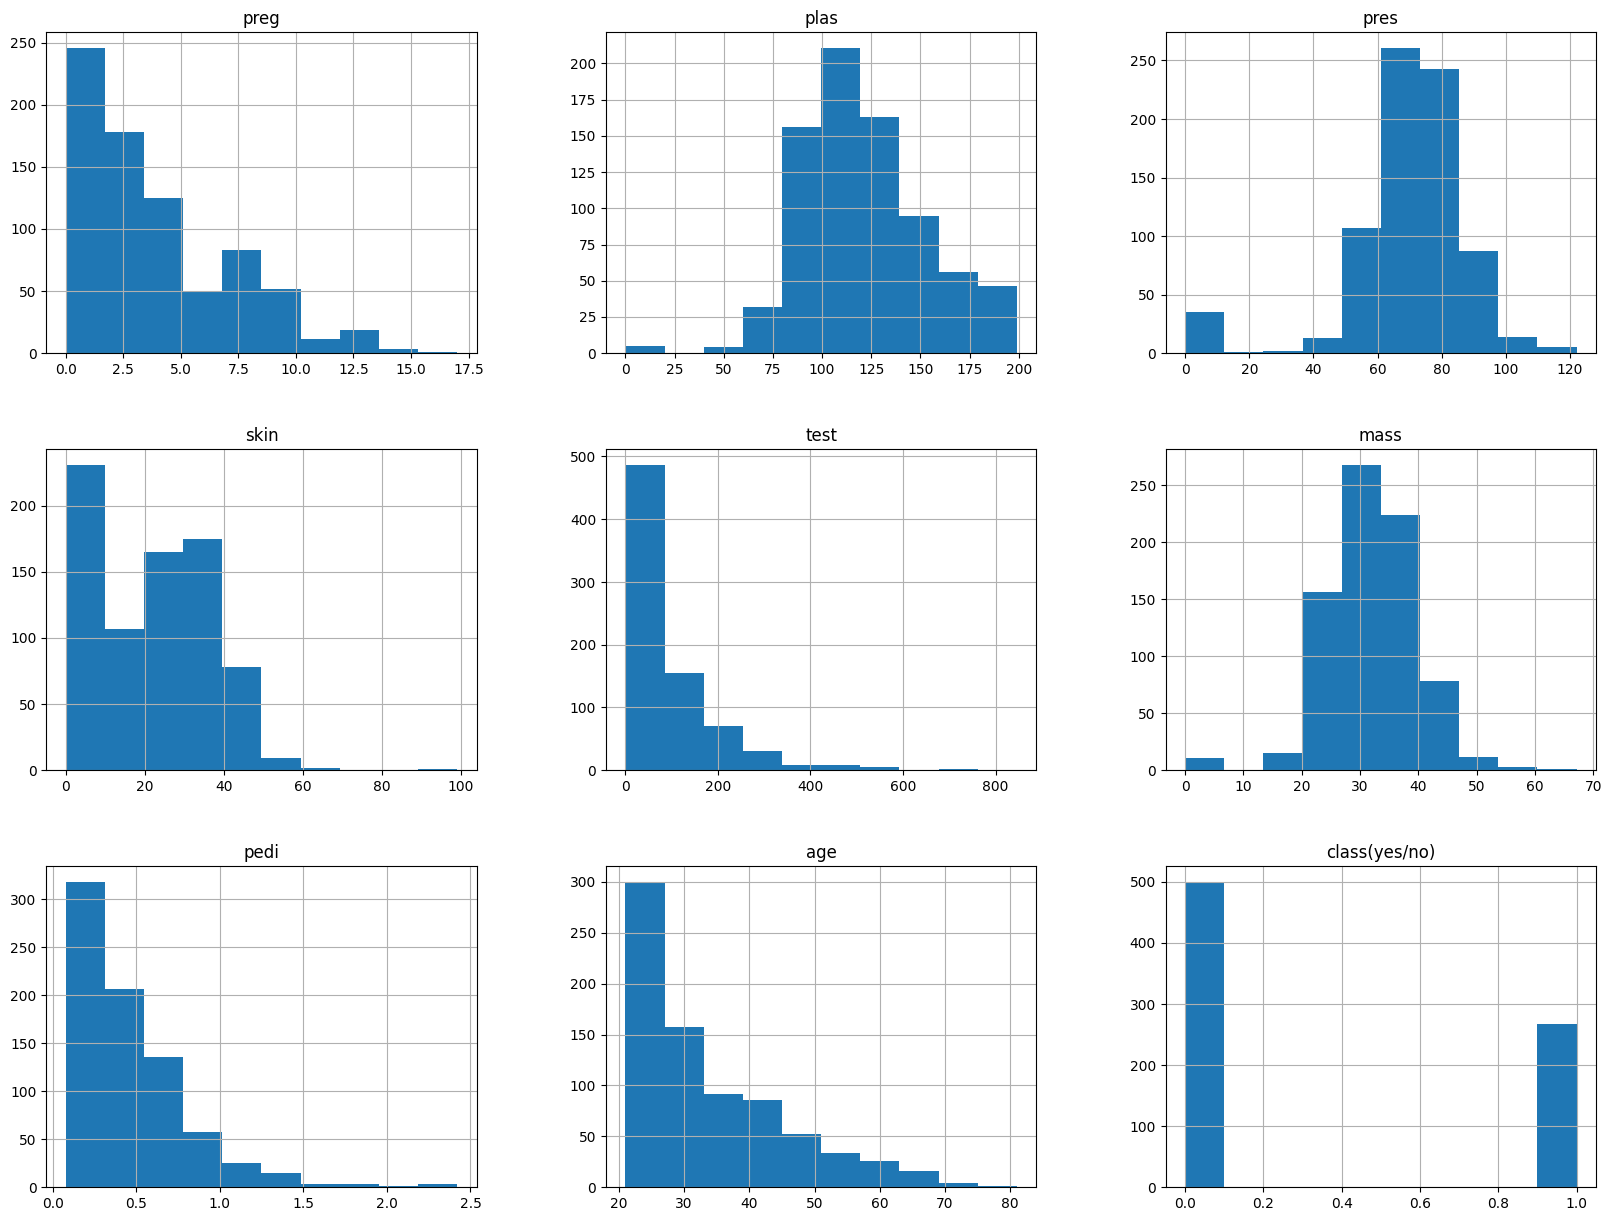

In [ ]:
df.hist(figsize=(20,15))
plt.show()

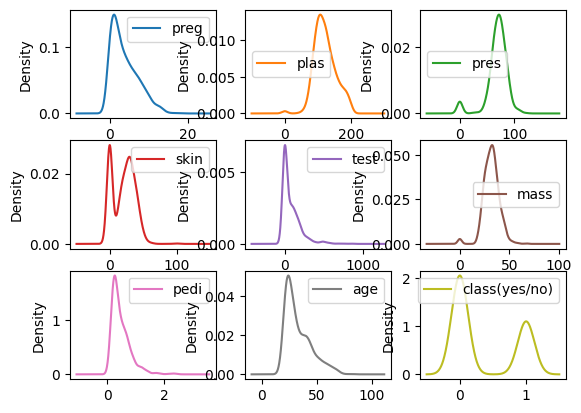

In [ ]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True)
plt.show()

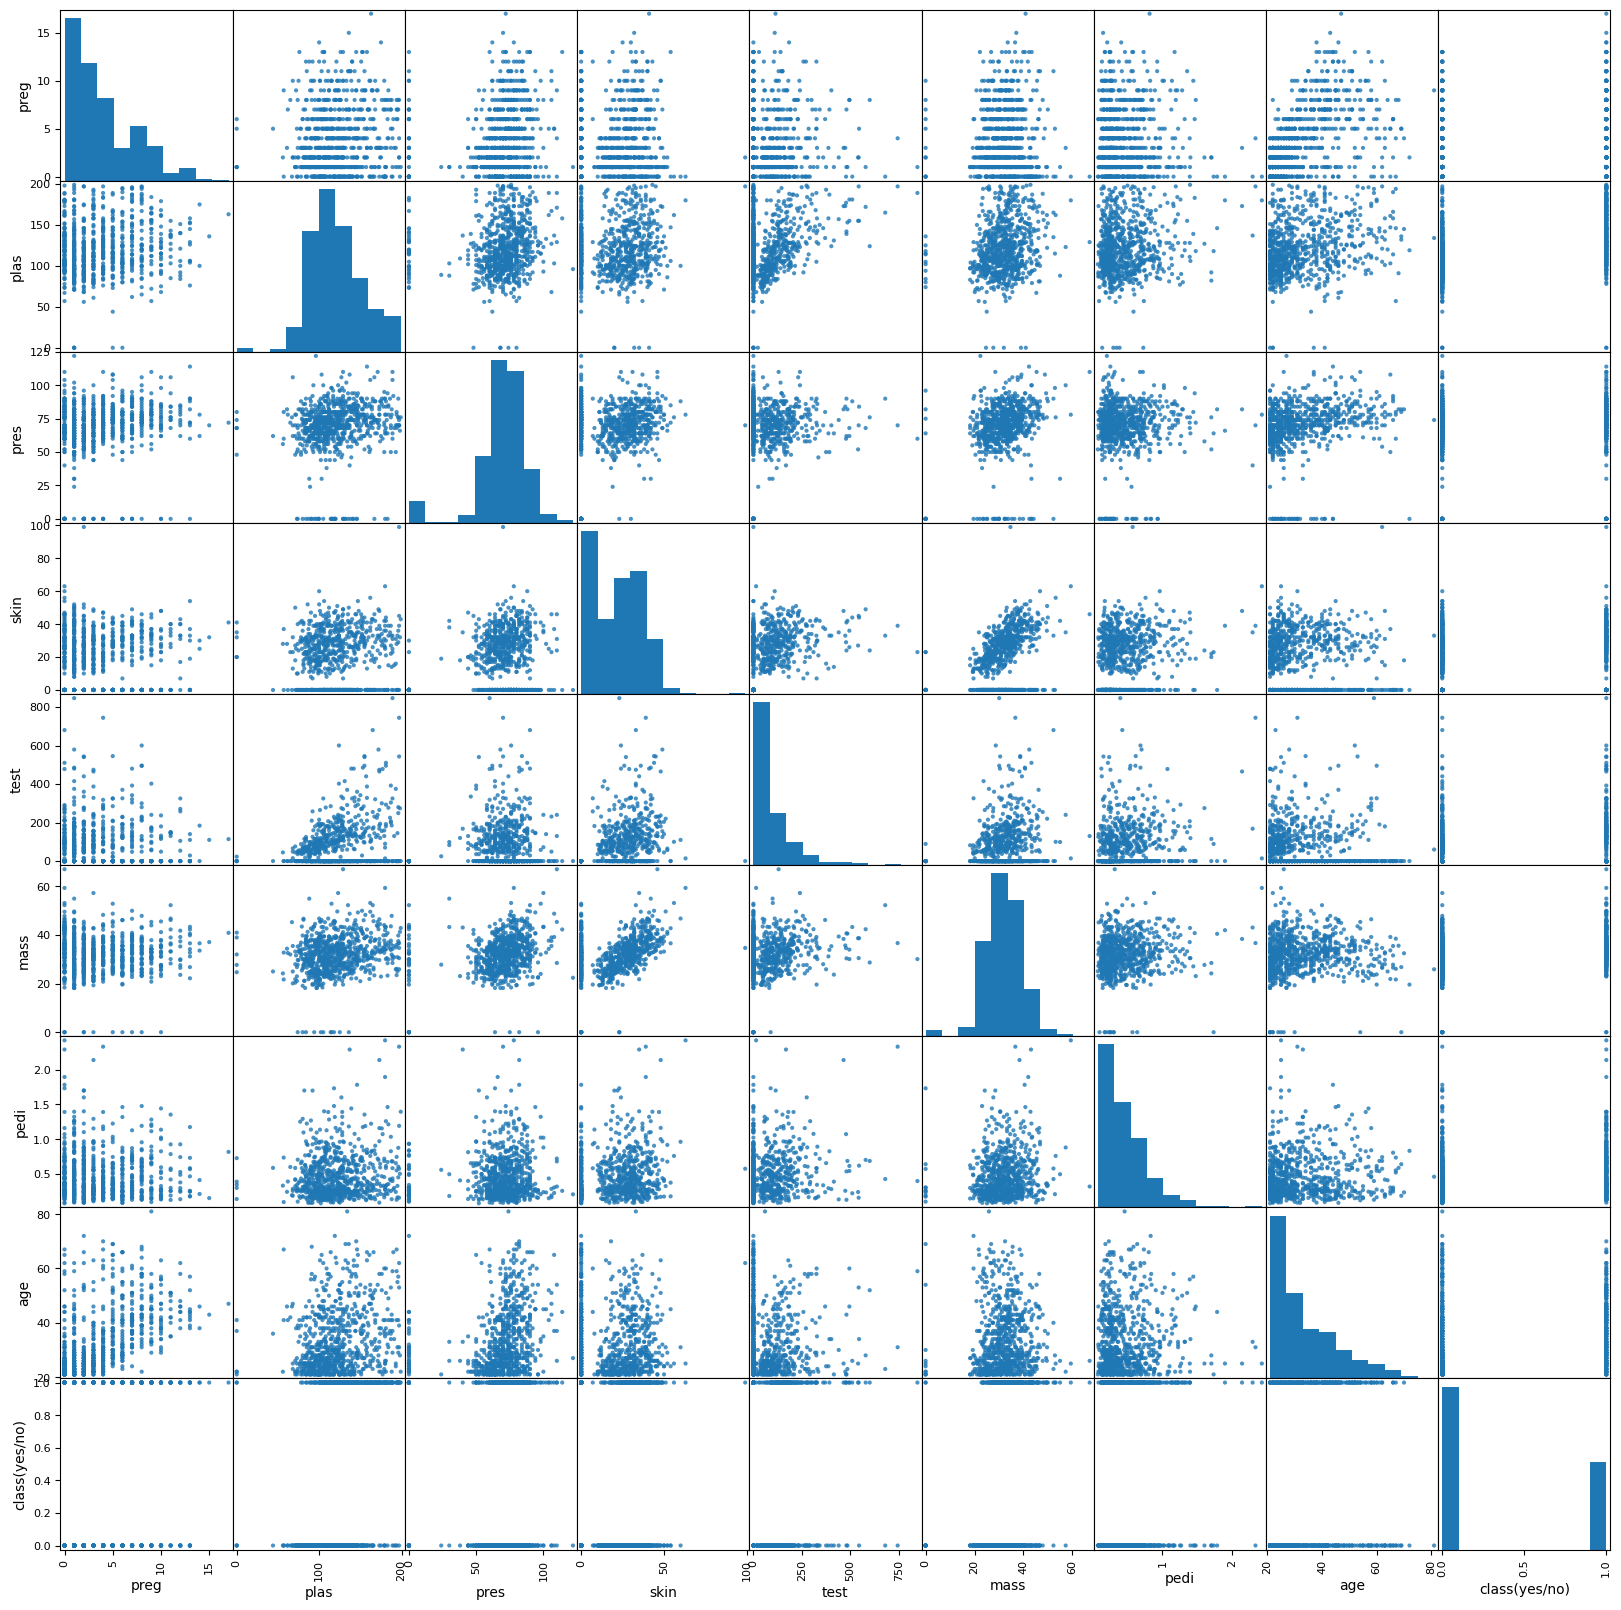

In [ ]:
#scatter plot matrix
scatter_matrix(df, alpha=0.8, figsize=(20,20))
plt.show()

In [ ]:
def find_outliers_z_score(df, threshold=3):
    outliers = {}
    for column in df.columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        outlier_data = z_scores > threshold
        outliers[column] = outlier_data.sum()  # Sum of 'True' values will give the total number of outliers

    return outliers


In [ ]:
outliers_z = find_outliers_z_score(df)
print("Outliers using Z-Score:")
print(outliers_z)

total_outliers = sum(outliers_z.values())
print("Total number of outliers across all columns:", total_outliers)


Outliers using Z-Score:
{'preg': 4, 'plas': 5, 'pres': 35, 'skin': 1, 'test': 18, 'mass': 14, 'pedi': 11, 'age': 5, 'class(yes/no)': 0}
Total number of outliers across all columns: 93


In [ ]:
import matplotlib.pyplot as plt
import math

def plot_outliers_z_score(df, threshold=3):
    # Calculate the number of rows and columns for the subplot grid
    num_columns = df.shape[1]
    num_rows = math.ceil(num_columns / 4)  # Adjust this value to change the number of plots per row

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*2))

    for ax, column in zip(axes.flatten(), df.columns):
        # Calculate Z-scores
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

        # Identify outliers
        outlier_data = z_scores > threshold

        # Plot non-outliers in blue
        ax.scatter(df.index[~outlier_data], df[column][~outlier_data], color='blue', label='Non-outliers')

        # Plot outliers in red
        ax.scatter(df.index[outlier_data], df[column][outlier_data], color='red', label='Outliers')

        # Set plot title and labels
        ax.set_title(f'Outliers in {column} using Z-Score')
        ax.set_xlabel('Index')
        ax.set_ylabel(column)

        # Show  nmm  mu8m u8nnjjnjknjnan<m the legend
        ax.legend()

    # Remove empty subplots
    if num_columns % 2 != 0:
        fig.delaxes(axes.flatten()[-1])

    # Show the plot
    plt.tight_layout()
    plt.show()


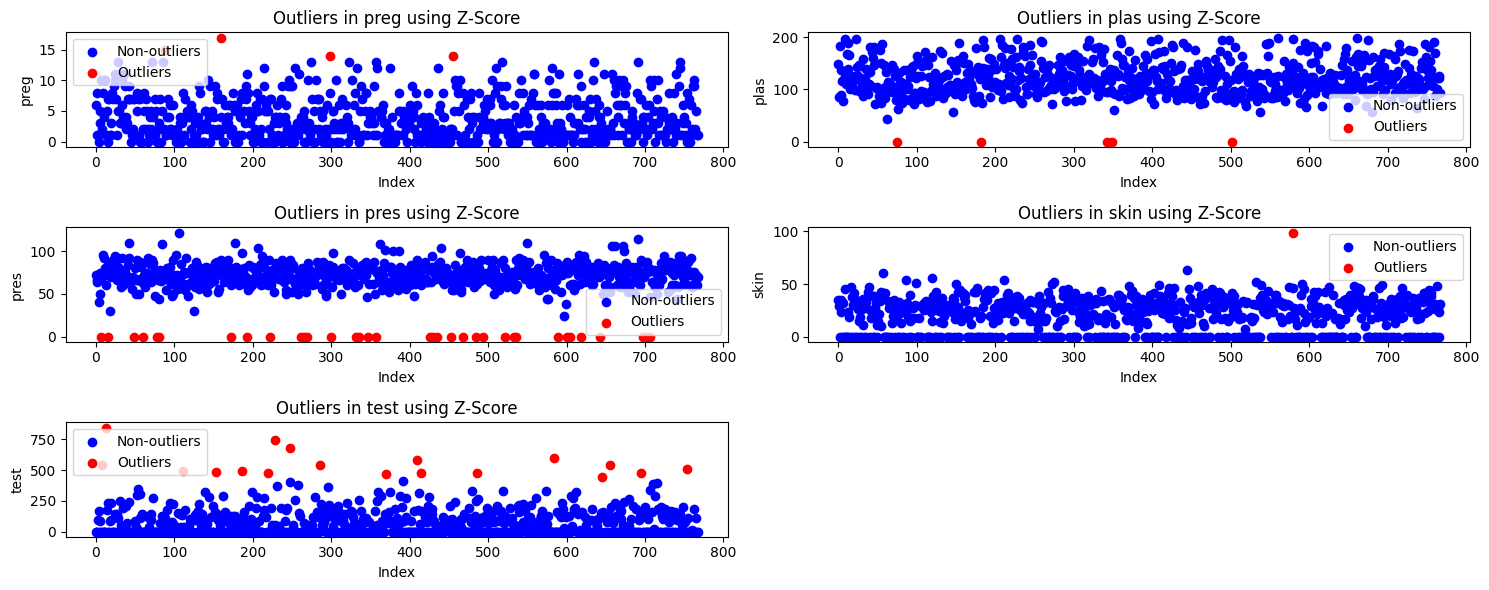

In [ ]:
plot_outliers_z_score(df)


In [ ]:
def remove_outliers_z_score(df, threshold=3):
    for column in df.columns:
        # Calculate Z-scores
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

        # Identify outliers
        outlier_data = z_scores > threshold

        # Remove outliers from the DataFrame
        df = df[~outlier_data]

    return df


In [ ]:
df = remove_outliers_z_score(df)

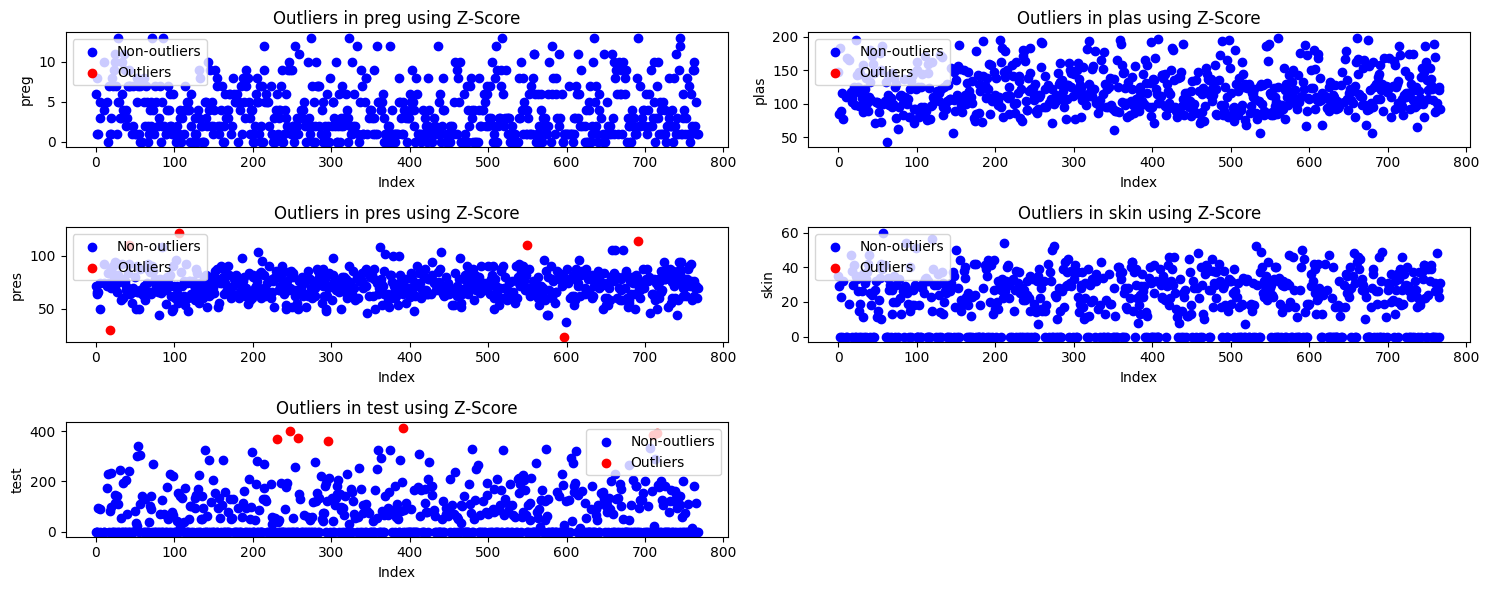

In [ ]:
plot_outliers_z_score(df)


# Seprate Dataset

In [ ]:
array=df.values

In [ ]:
X=array[:,0:8]
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [ ]:
Y=array[:,8]
print(Y)

[1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.

# Split Data

In [ ]:
test_size=0.33

In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=test_size,random_state=random_seed)

# Encode

# Building a MLP (Fully Connected NN)

In [ ]:
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

In [ ]:
def baseline_model():

    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))  # Adjusting units from 8 to 12 for better representation
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Using 'sigmoid' activation for binary classification
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Using 'binary_crossentropy' loss for binary classification
    return model

In [ ]:
model =baseline_model()

# Model Training

In [ ]:
# Converting X_train vlaues from object to float32
import numpy as np
X_train = X_train.astype(np.float32)

In [ ]:
history = model.fit(X_train, Y_train, epochs=150, batch_size=10)
training_accuracy = history.history['accuracy'][-1]


Epoch 1/150
46/46 [==============================] - 1s 11ms/step - loss: 5.6962 - accuracy: 0.4825
Epoch 2/150
46/46 [==============================] - 0s 8ms/step - loss: 4.4707 - accuracy: 0.4694
Epoch 3/150
46/46 [==============================] - 0s 8ms/step - loss: 3.7530 - accuracy: 0.5131
Epoch 4/150
46/46 [==============================] - 0s 8ms/step - loss: 2.7456 - accuracy: 0.4498
Epoch 5/150
46/46 [==============================] - 0s 8ms/step - loss: 1.9488 - accuracy: 0.5044
Epoch 6/150
46/46 [==============================] - 0s 7ms/step - loss: 1.4100 - accuracy: 0.5349
Epoch 7/150
46/46 [==============================] - 0s 8ms/step - loss: 1.1626 - accuracy: 0.5677
Epoch 8/150
46/46 [==============================] - 0s 8ms/step - loss: 1.0367 - accuracy: 0.6048
Epoch 9/150
46/46 [==============================] - 0s 8ms/step - loss: 0.8836 - accuracy: 0.6594
Epoch 10/150
46/46 [==============================] - 0s 8ms/step - loss: 0.8847 - accuracy: 0.6397
Epoch 11

In [ ]:
print("Training Accuracy:", training_accuracy*100)

Training Accuracy: 72.48908281326294


# Evaluation

In [ ]:
# !pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:

evaluator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=10)


In [ ]:

kfold = KFold(n_splits=10, shuffle=True, random_state=random_seed)

In [ ]:

results = cross_val_score(evaluator, X_test, Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))


Epoch 1/200


/Users/sathvikchowdaryveerapaneni/mac_gpu/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 15ms/step - loss: 13.2721 - accuracy: 0.5490
Epoch 2/200
21/21 [==============================] - 0s 8ms/step - loss: 6.6236 - accuracy: 0.7010
Epoch 3/200
21/21 [==============================] - 0s 8ms/step - loss: 2.7295 - accuracy: 0.6569
Epoch 4/200
21/21 [==============================] - 0s 8ms/step - loss: 1.6760 - accuracy: 0.6569
Epoch 5/200
21/21 [==============================] - 0s 8ms/step - loss: 1.7516 - accuracy: 0.6471
Epoch 6/200
21/21 [==============================] - 0s 8ms/step - loss: 1.5902 - accuracy: 0.6716
Epoch 7/200
21/21 [==============================] - 0s 8ms/step - loss: 1.5270 - accuracy: 0.6471
Epoch 8/200
21/21 [==============================] - 0s 8ms/step - loss: 1.3252 - accuracy: 0.6520
Epoch 9/200
21/21 [==============================] - 0s 8ms/step - loss: 1.3245 - accuracy: 0.6569
Epoch 10/200
21/21 [==============================] - 0s 8ms/step - loss: 1.3871 - accuracy: 0.6765
Epoch 11/200
21/21 

/Users/sathvikchowdaryveerapaneni/mac_gpu/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 13ms/step - loss: 16.9974 - accuracy: 0.6765
Epoch 2/200
21/21 [==============================] - 0s 8ms/step - loss: 4.6950 - accuracy: 0.5049
Epoch 3/200
21/21 [==============================] - 0s 8ms/step - loss: 3.4608 - accuracy: 0.4902
Epoch 4/200
21/21 [==============================] - 0s 8ms/step - loss: 2.9210 - accuracy: 0.4657
Epoch 5/200
21/21 [==============================] - 0s 8ms/step - loss: 2.4764 - accuracy: 0.5245
Epoch 6/200
21/21 [==============================] - 0s 9ms/step - loss: 2.3113 - accuracy: 0.5588
Epoch 7/200
21/21 [==============================] - 0s 8ms/step - loss: 2.2817 - accuracy: 0.5588
Epoch 8/200
21/21 [==============================] - 0s 8ms/step - loss: 1.9455 - accuracy: 0.5441
Epoch 9/200
21/21 [==============================] - 0s 8ms/step - loss: 1.5964 - accuracy: 0.5686
Epoch 10/200
21/21 [==============================] - 0s 8ms/step - loss: 1.7164 - accuracy: 0.5637
Epoch 11/200
21/21 

/Users/sathvikchowdaryveerapaneni/mac_gpu/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 15ms/step - loss: 17.2670 - accuracy: 0.6520
Epoch 2/200
21/21 [==============================] - 0s 8ms/step - loss: 8.6402 - accuracy: 0.5049
Epoch 3/200
21/21 [==============================] - 0s 8ms/step - loss: 5.9780 - accuracy: 0.5343
Epoch 4/200
21/21 [==============================] - 0s 8ms/step - loss: 3.8162 - accuracy: 0.5000
Epoch 5/200
21/21 [==============================] - 0s 8ms/step - loss: 2.3213 - accuracy: 0.4951
Epoch 6/200
21/21 [==============================] - 0s 8ms/step - loss: 1.6133 - accuracy: 0.5343
Epoch 7/200
21/21 [==============================] - 0s 8ms/step - loss: 1.0471 - accuracy: 0.5637
Epoch 8/200
21/21 [==============================] - 0s 7ms/step - loss: 1.0364 - accuracy: 0.6078
Epoch 9/200
21/21 [==============================] - 0s 8ms/step - loss: 0.7713 - accuracy: 0.6667
Epoch 10/200
21/21 [==============================] - 0s 8ms/step - loss: 0.8729 - accuracy: 0.6520
Epoch 11/200
21/21 

/Users/sathvikchowdaryveerapaneni/mac_gpu/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 15ms/step - loss: 24.1162 - accuracy: 0.6569
Epoch 2/200
21/21 [==============================] - 0s 8ms/step - loss: 11.4508 - accuracy: 0.4902
Epoch 3/200
21/21 [==============================] - 0s 8ms/step - loss: 5.9980 - accuracy: 0.3431
Epoch 4/200
21/21 [==============================] - 0s 9ms/step - loss: 4.5910 - accuracy: 0.4020
Epoch 5/200
21/21 [==============================] - 0s 8ms/step - loss: 3.7172 - accuracy: 0.4118
Epoch 6/200
21/21 [==============================] - 0s 9ms/step - loss: 3.1536 - accuracy: 0.3971
Epoch 7/200
21/21 [==============================] - 0s 8ms/step - loss: 2.3410 - accuracy: 0.4755
Epoch 8/200
21/21 [==============================] - 0s 8ms/step - loss: 2.1627 - accuracy: 0.4412
Epoch 9/200
21/21 [==============================] - 0s 8ms/step - loss: 1.4272 - accuracy: 0.4804
Epoch 10/200
21/21 [==============================] - 0s 8ms/step - loss: 1.1893 - accuracy: 0.5343
Epoch 11/200
21/21

/Users/sathvikchowdaryveerapaneni/mac_gpu/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 17ms/step - loss: 19.6235 - accuracy: 0.6863
Epoch 2/200
21/21 [==============================] - 0s 8ms/step - loss: 10.1885 - accuracy: 0.6863
Epoch 3/200
21/21 [==============================] - 0s 8ms/step - loss: 3.7862 - accuracy: 0.6029
Epoch 4/200
21/21 [==============================] - 0s 8ms/step - loss: 2.7255 - accuracy: 0.5441
Epoch 5/200
21/21 [==============================] - 0s 8ms/step - loss: 2.4469 - accuracy: 0.5735
Epoch 6/200
21/21 [==============================] - 0s 9ms/step - loss: 2.4462 - accuracy: 0.5833
Epoch 7/200
21/21 [==============================] - 0s 8ms/step - loss: 2.3100 - accuracy: 0.5784
Epoch 8/200
21/21 [==============================] - 0s 8ms/step - loss: 2.3123 - accuracy: 0.5735
Epoch 9/200
21/21 [==============================] - 0s 8ms/step - loss: 2.3563 - accuracy: 0.5637
Epoch 10/200
21/21 [==============================] - 0s 8ms/step - loss: 2.2544 - accuracy: 0.5539
Epoch 11/200
21/21

/Users/sathvikchowdaryveerapaneni/mac_gpu/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 16ms/step - loss: 72.3908 - accuracy: 0.3137
Epoch 2/200
21/21 [==============================] - 0s 9ms/step - loss: 50.0146 - accuracy: 0.3284
Epoch 3/200
21/21 [==============================] - 0s 9ms/step - loss: 33.4387 - accuracy: 0.3137
Epoch 4/200
21/21 [==============================] - 0s 8ms/step - loss: 22.4491 - accuracy: 0.3873
Epoch 5/200
21/21 [==============================] - 0s 8ms/step - loss: 15.6175 - accuracy: 0.4559
Epoch 6/200
21/21 [==============================] - 0s 8ms/step - loss: 10.7702 - accuracy: 0.4853
Epoch 7/200
21/21 [==============================] - 0s 8ms/step - loss: 6.9022 - accuracy: 0.5196
Epoch 8/200
21/21 [==============================] - 0s 8ms/step - loss: 4.0412 - accuracy: 0.4951
Epoch 9/200
21/21 [==============================] - 0s 8ms/step - loss: 3.2015 - accuracy: 0.5245
Epoch 10/200
21/21 [==============================] - 0s 8ms/step - loss: 2.8198 - accuracy: 0.5735
Epoch 11/200
2

/Users/sathvikchowdaryveerapaneni/mac_gpu/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 15ms/step - loss: 4.5743 - accuracy: 0.5882
Epoch 2/200
21/21 [==============================] - 0s 9ms/step - loss: 2.6309 - accuracy: 0.6765
Epoch 3/200
21/21 [==============================] - 0s 9ms/step - loss: 1.0913 - accuracy: 0.6765
Epoch 4/200
21/21 [==============================] - 0s 8ms/step - loss: 0.9016 - accuracy: 0.6814
Epoch 5/200
21/21 [==============================] - 0s 9ms/step - loss: 0.8385 - accuracy: 0.6961
Epoch 6/200
21/21 [==============================] - 0s 10ms/step - loss: 0.7650 - accuracy: 0.6814
Epoch 7/200
21/21 [==============================] - 0s 8ms/step - loss: 0.8080 - accuracy: 0.7010
Epoch 8/200
21/21 [==============================] - 0s 8ms/step - loss: 0.7901 - accuracy: 0.6863
Epoch 9/200
21/21 [==============================] - 0s 8ms/step - loss: 0.7571 - accuracy: 0.6863
Epoch 10/200
21/21 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.6863
Epoch 11/200
21/21 

/Users/sathvikchowdaryveerapaneni/mac_gpu/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 17ms/step - loss: 34.3418 - accuracy: 0.6878
Epoch 2/200
21/21 [==============================] - 0s 9ms/step - loss: 17.3346 - accuracy: 0.6585
Epoch 3/200
21/21 [==============================] - 0s 9ms/step - loss: 8.4564 - accuracy: 0.5902
Epoch 4/200
21/21 [==============================] - 0s 8ms/step - loss: 5.3152 - accuracy: 0.5171
Epoch 5/200
21/21 [==============================] - 0s 8ms/step - loss: 3.0743 - accuracy: 0.5073
Epoch 6/200
21/21 [==============================] - 0s 8ms/step - loss: 2.6335 - accuracy: 0.5659
Epoch 7/200
21/21 [==============================] - 0s 8ms/step - loss: 2.0695 - accuracy: 0.5610
Epoch 8/200
21/21 [==============================] - 0s 8ms/step - loss: 1.4747 - accuracy: 0.5805
Epoch 9/200
21/21 [==============================] - 0s 8ms/step - loss: 1.2305 - accuracy: 0.6049
Epoch 10/200
21/21 [==============================] - 0s 8ms/step - loss: 0.9217 - accuracy: 0.6878
Epoch 11/200
21/21

/Users/sathvikchowdaryveerapaneni/mac_gpu/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 17ms/step - loss: 5.6284 - accuracy: 0.6878
Epoch 2/200
21/21 [==============================] - 0s 10ms/step - loss: 2.4943 - accuracy: 0.6341
Epoch 3/200
21/21 [==============================] - 0s 9ms/step - loss: 1.6764 - accuracy: 0.6098
Epoch 4/200
21/21 [==============================] - 0s 10ms/step - loss: 1.7052 - accuracy: 0.6146
Epoch 5/200
21/21 [==============================] - 0s 9ms/step - loss: 1.3023 - accuracy: 0.6341
Epoch 6/200
21/21 [==============================] - 0s 9ms/step - loss: 1.1701 - accuracy: 0.6244
Epoch 7/200
21/21 [==============================] - 0s 9ms/step - loss: 1.1152 - accuracy: 0.6585
Epoch 8/200
21/21 [==============================] - 0s 9ms/step - loss: 0.9521 - accuracy: 0.6098
Epoch 9/200
21/21 [==============================] - 0s 9ms/step - loss: 0.9062 - accuracy: 0.6146
Epoch 10/200
21/21 [==============================] - 0s 9ms/step - loss: 0.8275 - accuracy: 0.6341
Epoch 11/200
21/21

/Users/sathvikchowdaryveerapaneni/mac_gpu/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 15ms/step - loss: 26.4427 - accuracy: 0.3220
Epoch 2/200
21/21 [==============================] - 0s 9ms/step - loss: 8.2203 - accuracy: 0.5073
Epoch 3/200
21/21 [==============================] - 0s 9ms/step - loss: 5.8235 - accuracy: 0.6293
Epoch 4/200
21/21 [==============================] - 0s 8ms/step - loss: 4.6227 - accuracy: 0.6049
Epoch 5/200
21/21 [==============================] - 0s 8ms/step - loss: 3.3589 - accuracy: 0.6000
Epoch 6/200
21/21 [==============================] - 0s 9ms/step - loss: 2.5202 - accuracy: 0.5951
Epoch 7/200
21/21 [==============================] - 0s 8ms/step - loss: 2.1064 - accuracy: 0.6293
Epoch 8/200
21/21 [==============================] - 0s 10ms/step - loss: 1.9611 - accuracy: 0.6634
Epoch 9/200
21/21 [==============================] - 0s 8ms/step - loss: 1.9475 - accuracy: 0.6439
Epoch 10/200
21/21 [==============================] - 0s 9ms/step - loss: 1.9100 - accuracy: 0.6537
Epoch 11/200
21/21

In [ ]:

X_test = X_test.astype('float32')# Convert to float32 or float64 depending on your requirements
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))


8/8 [==============================] - 0s 15ms/step - loss: 0.5833 - accuracy: 0.7533

accuracy: 75.33%
